In [1]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\Code\\OrbitalNeuralMethods")
using Revise
using OrbitalNeuralMethods
import OrbitalNeuralMethods as onm

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\Code\OrbitalNeuralMethods`
┌ Info: Precompiling OrbitalNeuralMethods [6de8678a-dd1c-461e-a987-24da1d9562b4]
└ @ Base loading.jl:1662


In [77]:
n = 2
ω = 0.25
ham = HOCoulomb(ω, shielding = 0.25);

In [78]:
l = 20
basis = SpinBasis(HOBasis(l, ω))
grid = [x for x in range(-10, stop = 10, length = 2001)]
system = System(n, basis, grid, ham);

mixer = Alpha(0.5)
rhf = RHF(system, mixer);
#rhf = compute_ground_state!(rhf, max_iter = 1000, tol = 1e-10, verbose=0);
energy(rhf)

0.7543263101923039

In [79]:
reference_energy(system)

1.3836526203846078

In [80]:
wf = Slater(rhf)
samples = 2^22
metro = Importance(equils = 1e4, samples = samples, step = 0.01);
#metro = Metropolis(equils = 1e4, samples = samples, step = 0.1);
samples

4194304

In [54]:
wf

Slater(2, [1.0; 0.0; … ; 0.0; 0.0;;], HOBasis(20, 0.25, [1.0, 10.0, 98.0, 940.0, 8812.0, 80600.0, 717880.0, 6.2116e6, 5.206568e7, 4.212712e8, 3.27552976e9, 2.43298736e10, 1.7123708128e11, 1.1284538464e12, 6.83237435072e12, 3.6727035808e13, 1.622991275584e14, 4.47726129728e14, -1.0409090397056e15, -2.6527231067264e16], [1.9793222660179253e-6, 1.3995921964547984e-5, 6.858001762628513e-5, 0.0002685491271281403, 0.0008900725069138335, 0.0025744587631209796, 0.006619300983107644, 0.015307340344441821, 0.03207656175642337, 0.06117328223773982, 0.10635711909316198, 0.16842770372676424, 0.2419724216433651, 0.3127268579428567, 0.3578277504388473, 0.3511782542488191, 0.2743360828963539, 0.1297895511290048, -0.05029083184981404, -0.207910374717676], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), Float64[], Float64[], Float64[], Float64[], Fl

In [99]:
samples_b = 2^22
metro_b = Importance(equils = 1e6, samples = samples_b, step = 0.01);
result = blocking(slater, ham, metro_b, nthreads = 12);
digits = Integer(-floor(log10(result.E_err)))
print("$(round(result.E, digits=digits)) ± $(round(result.E_err, digits=digits)), $(round(result.E - 0.8247, digits=digits))")

1.377 ± 0.008, 0.553

In [61]:
import LinearAlgebra as la
slater = Slater(2, Matrix{Float64}(la.I(l)), SpinBasis(HOBasis(l, ω)));

In [83]:
result = blocking(slater, ham, metro, nthreads = 12);
digits = Integer(-floor(log10(result.E_err))) + 1
print("$(round(result.E, digits=digits)) ± $(round(result.E_err, digits=digits)) Δ = $(round(result.E - energy(rhf), digits=digits))")

1.3842 ± 0.0086 Δ = 0.6299

In [ ]:
1.1827 ± 0.0063 Δ = 0.0031

In [227]:
rhf_p_density = particle_density(System(rhf));

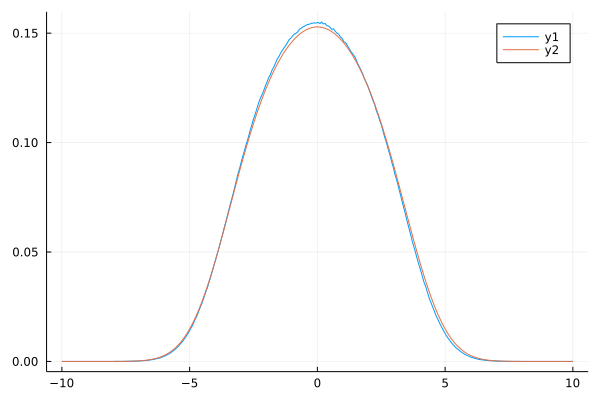

In [229]:
ob_result = onebody(wf, ham, metro, start = -10, stop = 10, length = 300, nthreads = 8);
(; radius, oneBodyDensity) = ob_result;

plt.plot(radius, oneBodyDensity)
plt.plot!(grid, rhf_p_density./2)